<h1>Regression Models</h1>

<b>Project description: </b> Energy efficiency data set consists of 8 different features (X1-X8) that are affecting building energy efficiency such as heating load (Y1) and cooling load (Y2). Y1 and Y2 represent required energy required to heat or cool the building. The goal of this study will be to use regression models to predict Y1 and Y2 in relationship to features X1- X8. <br>
Data set that will be used to solve this problem consists of 768 samples. <br>
The goal with regression models is to predict the output value(continuous).


This data set is used under Creative Commons Attribution 4.0 International licence. <br>
It is using <b>Energy Efficiency</b> data set from <b>UCI Machine Learning Repository</b><br>
The data set can be found at: <a href ="https://archive.ics.uci.edu/dataset/242/energy+efficiency">Energy Efficiency data set</a>

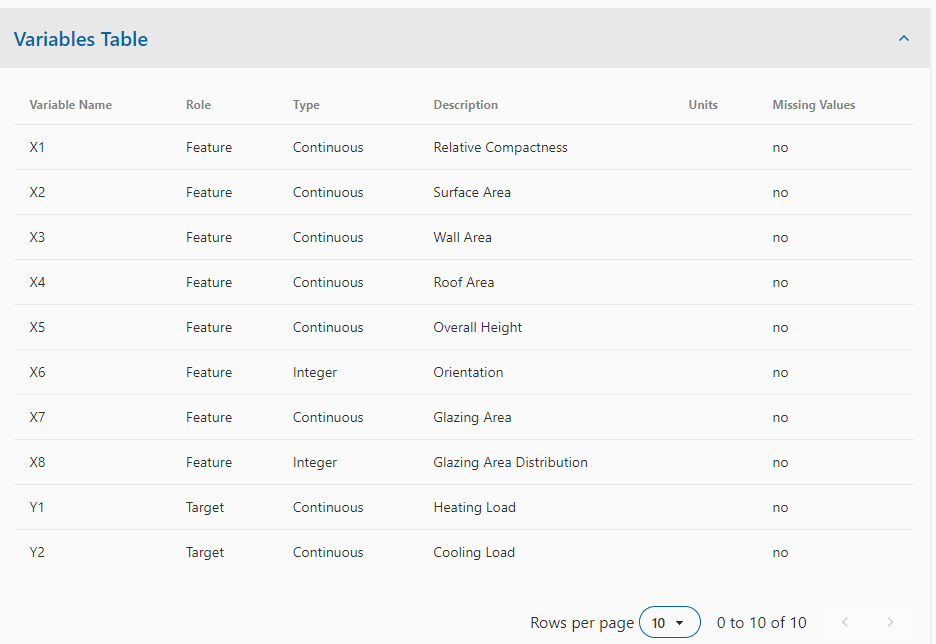 <br>
Source: Tsanas, A., & Xifara, A. (2012). Energy Efficiency Data Set. UCI Machine Learning Repository. Retrieved from https://archive.ics.uci.edu/ml/datasets/Energy+Efficiency

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

from matplotlib.colors import LinearSegmentedColormap

In [24]:
#leading the excel file
df = pd.read_excel("ENB2012_data.xlsx")

<h2>Data preparation</h2>

<h3>1.Perform exploratory data analysis (EDA) to understand the distribution of variables, identify outliers, and check for missing values.</h3>

In [26]:
#printing first top 5 rows
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [27]:
#printing column names, non null count for each column and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [28]:
#describe gives us information about data set, such as number of entries, mean, max and min and quartiles
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


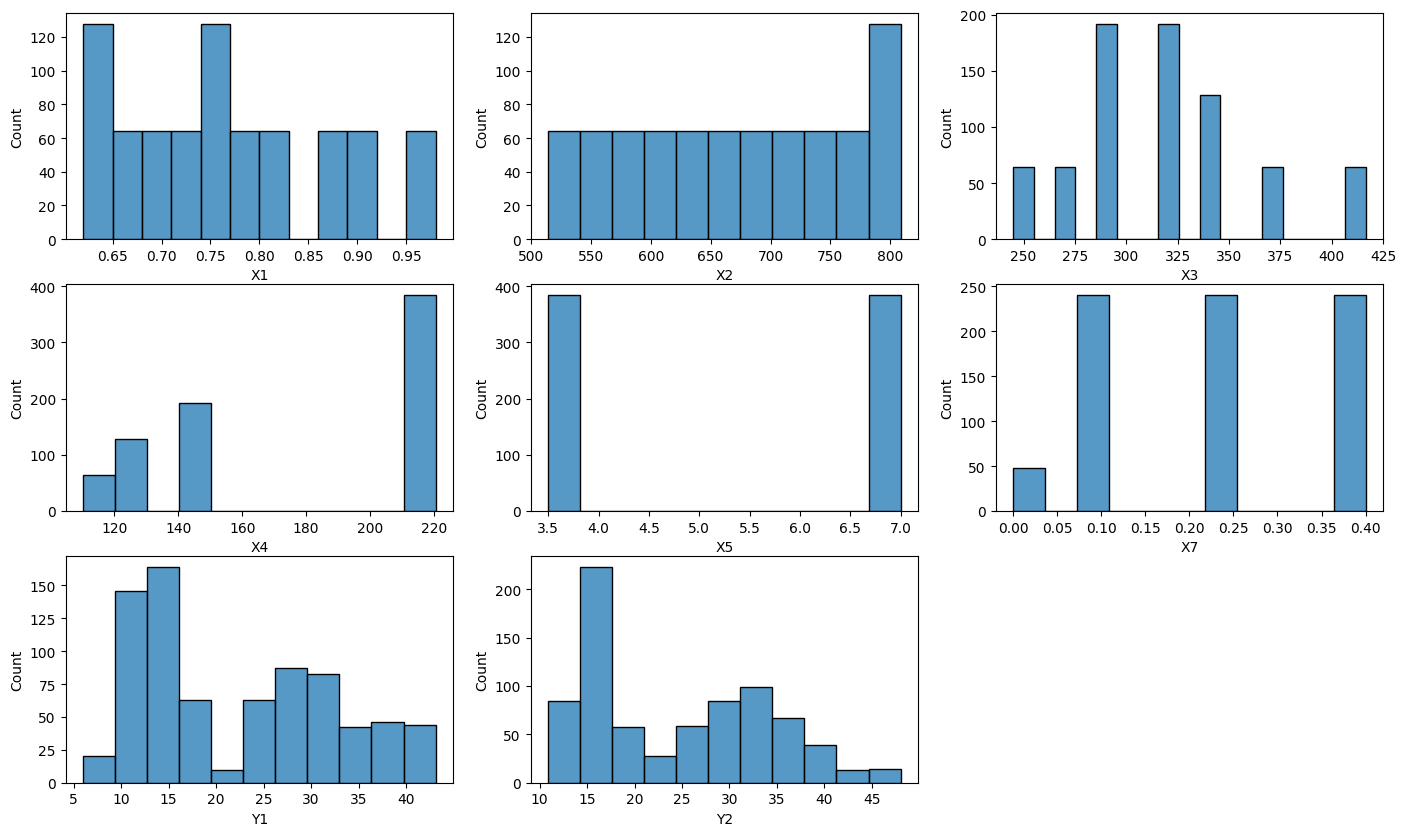

In [36]:
figure, axs = plt.subplots(3, 3, figsize=(17, 10))
axs = axs.flatten()

continous_coulms = ['X1', 'X2', 'X3', 'X4', 'X5', 'X7', 'Y1', 'Y2']

for i, col in enumerate(continous_coulms):
    sns.histplot(df[col], ax=axs[i])

axs[8].set_visible(False)

In [33]:
print('Unique values for X3 are: ', df['X3'].unique())
print('Unique values for X4 are: ',df['X4'].unique())
print('Unique values for X5 are: ',df['X5'].unique())
print('Unique values for X7 are: ',df['X7'].unique())

Unique values for X3 are:  [294.  318.5 343.  416.5 245.  269.5 367.5]
Unique values for X4 are:  [110.25 122.5  147.   220.5 ]
Unique values for X5 are:  [7.  3.5]
Unique values for X7 are:  [0.   0.1  0.25 0.4 ]


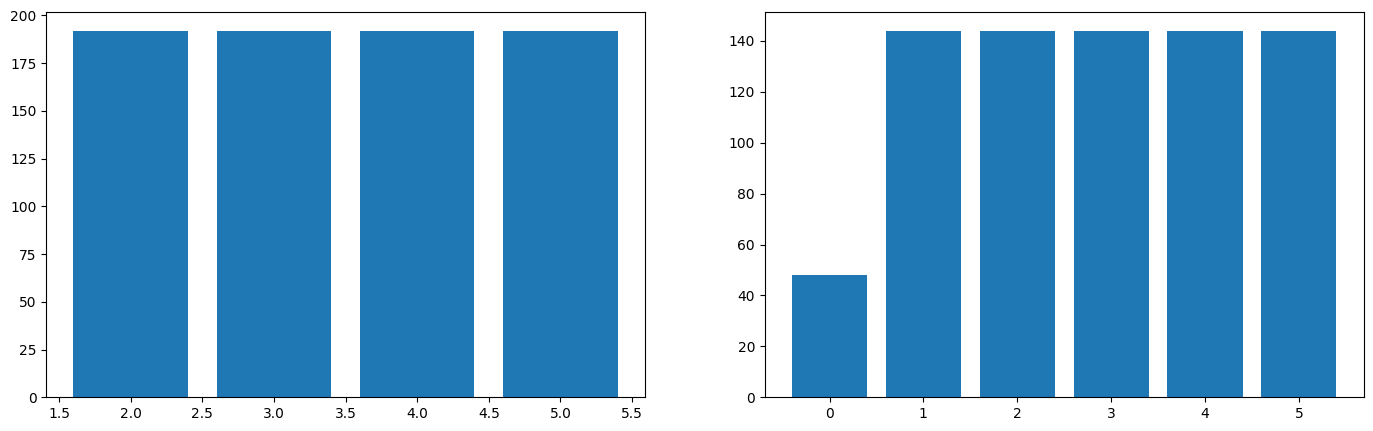

In [33]:
figure, axs = plt.subplots(1, 2, figsize=(17, 5))
axs = axs.flatten()

int_coulms = ['X6', 'X8']

for i, col in enumerate(int_coulms):
    axs[i].bar(df[col].value_counts().index, df[col].value_counts().values)

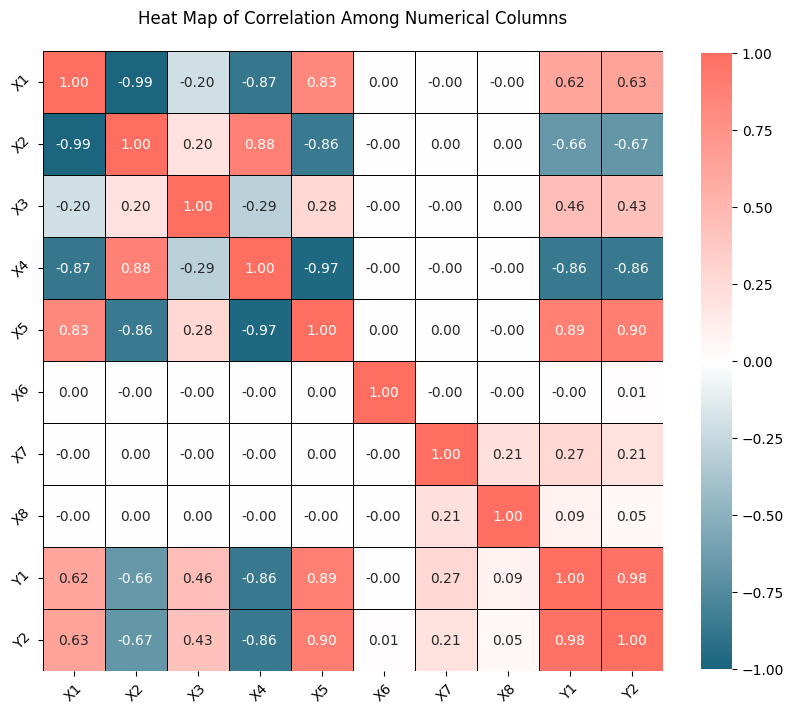

In [40]:
correlation_matrix = df.corr()
my_colors = ['#19647E', '#FFFFFF', '#FF6F61']
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", my_colors)


plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=custom_cmap, square=True, 
            cbar_kws={"shrink": .8}, linewidths=0.5, linecolor='black', vmin=-1, vmax=1)

plt.title('Heat Map of Correlation Among Numerical Columns', pad=20)
plt.xticks(ticks=np.arange(len(df.columns)) + 0.5, labels=df.columns.str.replace("_", " "), rotation=45) 
plt.yticks(ticks=np.arange(len(df.columns)) + 0.5, labels=df.columns.str.replace("_", " "), rotation=45) 

plt.show()